# Fusion lengths
Plot a frequency diagram of fusion lengths against the dynamic count for each file.

In [30]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import os
from matplotlib.ticker import MaxNLocator

In [31]:
with open('config.json') as f:
    data = json.load(f)

if (data['dirName'] != ""):
    full_path = f"{data['dirPath']}/{data['dirName']}"
else:
    # get the most recently run experiment
    path = data['dirPath']
    folder_names = sorted([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
    most_recent = folder_names[-1]
    print(f"defaulting to most recent experiment: {most_recent}")
    full_path = f"{path}/{most_recent}"

defaulting to most recent experiment: 2025_04_16_17:58:46.107384


In [32]:
csv_path = f"{full_path}/fusionLengths.csv"
img_path = f"{full_path}/fusionLengths.png"

In [33]:
df = pd.read_csv(csv_path)

In [34]:
aggregated_data = df.groupby(['rule_title', 'user_defined_key', 'fusion_length']).agg(
    total_count=('count', 'sum'),
)

In [35]:
aggregated_data = aggregated_data.reset_index()
allowed_titles = ['arithmetic end memory/branch']
aggregated_data = aggregated_data[aggregated_data['rule_title'].isin(allowed_titles) & (aggregated_data['user_defined_key'] == "l-0")]
grouped = aggregated_data.groupby(['rule_title', 'user_defined_key'])

[(143, 33825), (127, 32619882), (45, 13431), (39, 8925), (36, 994), (33, 471967), (32, 12437), (29, 542009), (28, 180), (27, 1530287), (26, 180), (25, 117), (24, 7969), (22, 1065355), (21, 8086), (20, 51451), (19, 15745963), (18, 1623134), (17, 171407), (16, 3248521), (15, 391040), (14, 2189425), (13, 16901410), (12, 7146906), (11, 9811401), (10, 106496302), (9, 60165624), (8, 413851685), (7, 504791406), (6, 1769139604), (5, 5349267423), (4, 10992477228), (3, 20569282700), (2, 26677208196), (1, 61113067471)]
0.07332297927301575


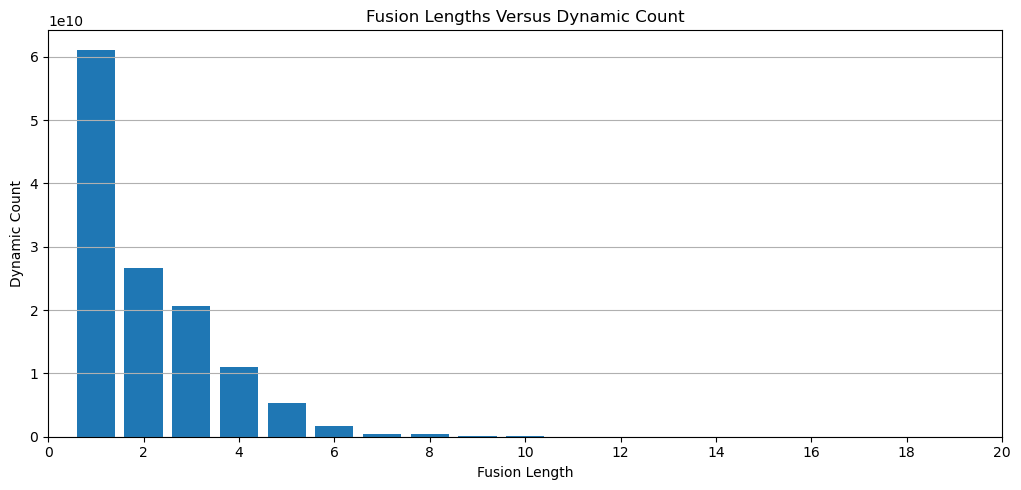

In [42]:
num_groups = len(grouped)
cols = 2
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    data = group_data.reset_index()
    group_title = (
        f"{group_name[0]}\n"
        # f"Max {group_name[1]}\n"
    )

    axes[i].bar(data['fusion_length'], data['total_count'])
    axes[i].set_title(f'Fusion Lengths Versus Dynamic Count')
    axes[i].set_xlabel('Fusion Length')
    axes[i].set_ylabel('Dynamic Count')
    axes[i].tick_params(axis='x')
    max_x = max(group_data['fusion_length'].max()+1, 5)
    axes[i].set_xlim(left=0, right=20)
    axes[i].grid(axis='y')
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))

    print(sorted(zip(group_data['fusion_length'], group_data['total_count']), reverse=True))

    long_count = 0
    total_count = 0
    for (length, count) in zip(group_data['fusion_length'], group_data['total_count']):
        if (length > 10):
            long_count += count
        total_count += count
    print(long_count/total_count*100)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(img_path, dpi=100, bbox_inches='tight')
plt.show()